# 4. Training Classifier

In [1]:
import pickle
import numpy as np
from numpy import genfromtxt
from sklearn.feature_extraction.text import TfidfVectorizer
#Try different classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
# choose one
# file_ext = '_no_lemm'
# file_ext = '_no_stop'
file_ext = ''

# Dataframe
path_df = "Data/df.pickle"
path_df_csv = f"Data/df{file_ext}.csv"

df = pd.read_csv(path_df_csv)
# with open(path_df, 'rb') as data:
#     df = pickle.load(data)

# features_train
path_features_train = "Data/features_train.pickle"
path_features_train_csv = f"Data/features_train{file_ext}.csv"

features_train = genfromtxt(path_features_train_csv, delimiter=',')
# with open(path_features_train, 'rb') as data:
#     features_train = pickle.load(data)

# labels_train
path_labels_train = "Data/labels_train.pickle"
path_labels_train_csv = f"Data/labels_train{file_ext}.csv"

temp = pd.read_csv(path_labels_train_csv, names=['Category_Code'])
labels_train = temp['Category_Code']
# with open(path_labels_train, 'rb') as data:
#     labels_train = pickle.load(data)

# features_test
path_features_test = "Data/features_test.pickle"
path_features_test_csv = f"Data/features_test{file_ext}.csv"

features_test = genfromtxt(path_features_test_csv, delimiter=',')
# with open(path_features_test, 'rb') as data:
#     features_test = pickle.load(data)

# labels_test
path_labels_test = "Data/labels_test.pickle"
path_labels_test_csv = f"Data/labels_test{file_ext}.csv"

temp = pd.read_csv(path_labels_test_csv, names=['Category_Code'])
labels_test = temp['Category_Code']
# with open(path_labels_test, 'rb') as data:
#     labels_test = pickle.load(data)

In [3]:
print(features_train.shape)
print(features_test.shape)

(1891, 300)
(334, 300)


In [4]:
models = {1:'Logistic Regression',
          2:'Multinomial Naive Bayes', 
          3:'K Nearest Neighbour', 
          4:'Support Vector Machines', 
          5:'Random Forest'}

## Cross-Validation for Hyperparameter Tuning

In [5]:
# Pilihan jenis classifier. Untuk selain nomor 1, maka perlu penyesuaian di bagian Random Search dan Grid Search.

choice = 5

if choice == 1:
    classifier = LogisticRegression(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==2:
    classifier = MultinomialNB()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    print(classifier)
elif choice==3:
    classifier =KNeighborsClassifier()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==4:
    classifier =svm.SVC(random_state=8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==5:
    classifier = RandomForestClassifier(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())

Parameters currently in use in Random Forest:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


### Randomized Search Cross Validation

Cari parameter yang secara random menggunakan cross validation.

In [6]:
if choice == 1:
    # Create the random grid logistic regression
    random_grid = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
               'class_weight': ['balanced', None],
               'penalty': ['l2']}
elif choice==2:
    pass
elif choice==3:
    pass
elif choice==4:
    # Create the random grid SVM
    random_grid = {'C': [.0001, .001, .01],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': [.0001, .001, .01, .1, 1, 10, 100],
                  'degree': [1, 2, 3, 4, 5],
                 }
elif choice==5:
    # Create the random grid Random Forest
    random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [20, 40, 60, 80, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }
    
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [7]:
# Definition of the random search
random_search = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=random_grid,
                                   n_iter=25,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  4.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [8]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.9423585404547858


### Grid Search Cross Validation

Kemudian lanjutkan pencarian yang lebih detil terhadap daerah nilai terbaik hasil random search di atas.

In [9]:

# Create the parameter grid based on the results of random search 
param_grid = random_grid

# Create a base model
# classifier = LogisticRegression(random_state=8)

In [10]:
# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 1, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 1 folds for each of 1080 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed: 47.4min finished


GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_...
                                              oob_score=False, random_state=8,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True,

In [11]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}

The mean accuracy of a model with these hyperparameters is:
0.9536


In [12]:
best_classifier = grid_search.best_estimator_

best_classifier

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

### Model fit and performance

In [13]:
best_classifier.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [14]:
classifier_pred = best_classifier.predict(features_test)

In [22]:
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(labels_train, best_classifier.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, classifier_pred)
}

df_models = pd.DataFrame(d, index=[0])
df_models

,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest,1.0,0.928144


In [16]:
labels_test.shape

(334,)

In [17]:
# Classification report
print("Classification report")
print(classification_report(labels_test,classifier_pred))

Classification report
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        81
           1       0.90      0.92      0.91        49
           2       0.97      0.86      0.91        72
           3       0.97      0.96      0.97        72
           4       0.95      0.93      0.94        60

    accuracy                           0.93       334
   macro avg       0.93      0.93      0.93       334
weighted avg       0.93      0.93      0.93       334



### Confusion Matrix

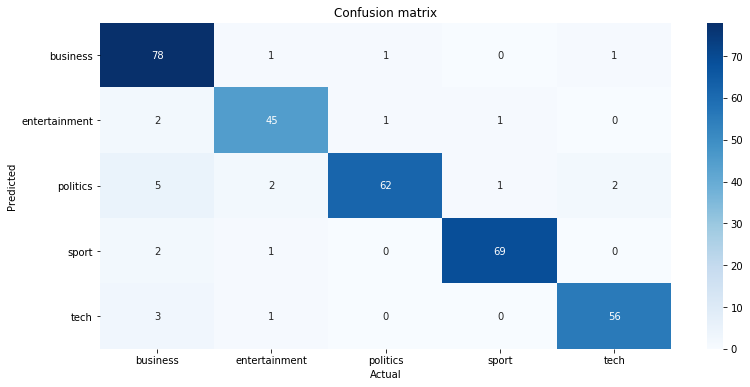

In [18]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Bandingkan performansi dengan base model, yaitu model dengan parameter default.

In [19]:
base_model = LogisticRegression(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.9431137724550899

In [20]:
best_classifier.fit(features_train, labels_train)
accuracy_score(labels_test, best_classifier.predict(features_test))

0.9281437125748503

In [21]:
best_classifier.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)>

# Latihan

1. Ubah format penyimpanan data ke CSV
2. Coba buatkan feature berikut (save dan upload feature), lalu laporkan pengaruhnya terhadap akurasi klasifikasi:
    a. Tanpa proses normalisation
    b. Tanpa proses lemmatisation
    c. Tanpa menghilangkan stopwords
3. Coba buat tfidf dengan nilai "max_features" yang berbeda-beda (lebih besar dan lebih kecil dari 300), lalu laporkan pengaruhnya terhadap akurasi klasifikasi.
4. Coba dengan beberapa algoritma klasifikasi yang berbeda (minimal 2 algoritma), carilah parameter terbaik (jelaskan nilai2 parameter yang telah dicoba untuk tiap jenis algoritma).
5. Jika anda ingin menggunakan teks bahasa Indonesia, bagian mana saja yang perlu dilakukan penyesuaian?
6. Opsional: Gunakan word embedding (e.g word2vec, GloVe).

# Jawaban

Jawaban ditulis dalam sebuah laporan singkat format pdf

**Summary of what I've done to make it easier to assess this assignment**
1. Done!
2. Partial Done (2/3)
    - (a) Not Done!
    - (b) Done!
    - (c) Done!
3. Done!
4. Done!
5. Done!
6. Not Done!

semua jawaban dijabarkan di laporan